0.0 0.8078862409017483 0.0007063437643783985
0.010101010101010102 0.8078862409017471 0.0007063437643783952
0.020202020202020204 0.8078862409017504 0.0007063437643783952
0.030303030303030304 0.8078862409017477 0.0007063437643783952
0.04040404040404041 0.8078862409017489 0.0007063437643783952
0.05050505050505051 0.807886240901749 0.0007063437643783996
0.06060606060606061 0.8078862409017495 0.0007063437643783996
0.07070707070707072 0.8078862409017482 0.0007063437643783953
0.08080808080808081 0.8078862409017484 0.0007063437643783952
0.09090909090909091 0.8078862409017497 0.0007063437643783932
0.10101010101010102 0.8078862409017475 0.0007063437643783997
0.11111111111111112 0.8078862409017503 0.0007063437643783919
0.12121212121212122 0.8078862409017489 0.0007063437643783933
0.13131313131313133 0.8078862409017493 0.0007063437643783985
0.14141414141414144 0.8078862409017489 0.0007063437643783997
0.15151515151515152 0.8078862409017473 0.0007063437643784036
0.16161616161616163 0.8078862409017484

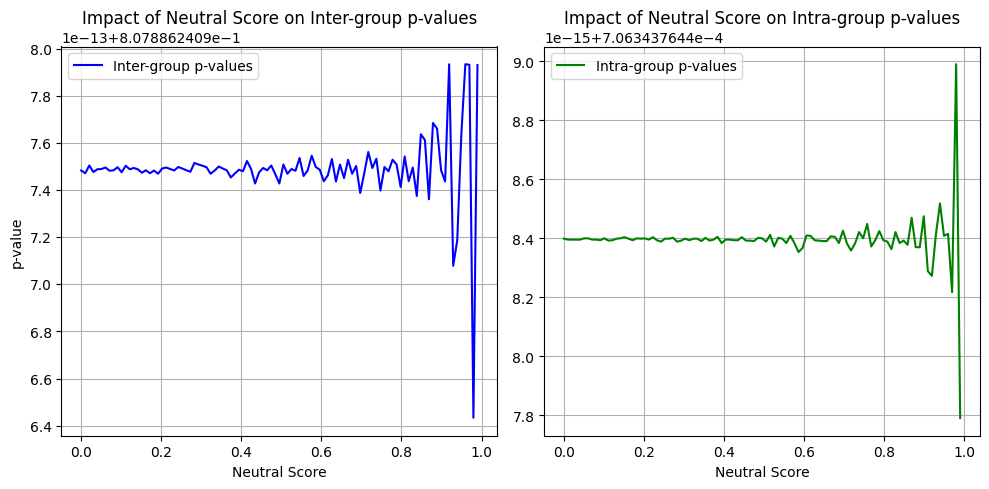

In [7]:
import json
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# 加载数据
data = json.load(open('data/checks.json'))

# Neutral值的可能范围
neutral_values = np.linspace(0, 1, 100)  # 从0.1到1，共10个值

# 记录结果
results = []

def compute_similarities(neutral_score):
    score_map = {
        "Entailment": 1,
        "Neutral": neutral_score,
        "Contradiction": 0
    }

    # 读取标签数据
    batch_labels = {
        "1_2": data["1_2"],
        "1_3": data["1_3"],
        "2_1": data["2_1"],
        "3_1": data["3_1"],
        "1_4": data["1_4"],
        "4_1": data["4_1"]
    }

    # 初始化相似度矩阵
    similarity_1_2 = np.zeros((10, 10))
    similarity_1_3 = np.zeros((10, 10))
    similarity_1_4 = np.zeros((10, 10))

    # 计算相似度矩阵
    for label_key in ["1_2", "2_1", "1_3", "3_1", "1_4", "4_1"]:
        group1, group2 = label_key.split('_')
        similarity_matrix = np.zeros((10, 10))
        for i in range(10):
            for j in range(10):
                score = 0
                length = 0
                for claims in batch_labels[label_key][i]:
                    score += score_map[claims[j]]
                    length += 1
                similarity_matrix[i][j] = score / length
        if label_key in ["1_2", "2_1"]:
            similarity_1_2 = similarity_matrix
        elif label_key in ["1_3", "3_1"]:
            similarity_1_3 = similarity_matrix
        else:
            similarity_1_4 = similarity_matrix

    # 进行t检验
    t1, p1 = ttest_ind(similarity_1_2.flatten(), similarity_1_3.flatten())
    t2, p2 = ttest_ind(similarity_1_2.flatten(), similarity_1_4.flatten())
    
    return p1, p2

# 改变Neutral值，计算影响
for neutral in neutral_values:
    p1, p2 = compute_similarities(neutral)
    print(neutral, p1, p2)  
    results.append((neutral, p1, p2))


# 绘制两张图
plt.figure(figsize=(10, 5))

# 绘制Inter-group p-values
plt.subplot(1, 2, 1)
neutral_scores, p_values_inter, _ = zip(*results)
print(p_values_inter)   
plt.plot(neutral_scores, p_values_inter, label='Inter-group p-values', color='blue')
plt.xlabel('Neutral Score')
plt.ylabel('p-value')
plt.title('Impact of Neutral Score on Inter-group p-values')
plt.legend()
plt.grid(True)

# 绘制Intra-group p-values
plt.subplot(1, 2, 2)
_, _, p_values_intra = zip(*results)
print(p_values_intra)
plt.plot(neutral_scores, p_values_intra, label='Intra-group p-values', color='green')
plt.xlabel('Neutral Score')
plt.title('Impact of Neutral Score on Intra-group p-values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
